In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Creating Labels

In [5]:
directory = "PokemonData"
labels = os.listdir(directory)
nb = len(labels)
print(labels)

['Poliwag', 'Voltorb', 'Rhydon', 'Kingler', 'Poliwrath', 'Jynx', 'Weedle', 'Cloyster', 'Exeggutor', 'Fearow', 'Alakazam', 'Dragonite', 'Oddish', 'Pidgeot', 'Shellder', 'Victreebel', 'Gengar', 'Gloom', 'Bulbasaur', 'Machoke', 'Dratini', 'Psyduck', 'Parasect', 'Metapod', 'Geodude', 'Clefable', 'Horsea', 'Nidorino', 'Dewgong', 'Paras', 'Clefairy', 'Tentacool', 'Arcanine', 'Magikarp', 'Ditto', 'Lickitung', 'Kangaskhan', 'Flareon', 'Squirtle', 'Golbat', 'Electrode', 'Machop', 'Alolan Sandslash', 'MrMime', 'Goldeen', 'Charizard', 'Rattata', 'Exeggcute', 'Moltres', 'Dugtrio', 'Jolteon', 'Dodrio', 'Nidoqueen', 'Jigglypuff', 'Spearow', 'Omanyte', 'Zubat', 'Lapras', 'Beedrill', 'Graveler', 'Magmar', 'Persian', 'Weezing', 'Charmander', 'Magnemite', 'Dragonair', 'Ninetales', 'Hypno', 'Nidorina', 'Mankey', 'Starmie', 'Blastoise', 'Slowbro', 'Kakuna', 'Bellsprout', 'Koffing', 'Cubone', 'Raticate', 'Snorlax', 'Primeape', 'Pidgeotto', 'Mewtwo', 'Venonat', 'Wigglytuff', 'Kadabra', 'Machamp', 'Porygon',

In [6]:
print(nb)

150


In [7]:
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Converting images to Numpy arrays

* Changed their dimensions to 150 x 150
* Normalized the pixel values

In [8]:
stored = {}
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):
            
#             print(os.path.join(folder,image))
            try:
                img=load_img(os.path.join(folder,image), target_size=(150,150))
                img=img_to_array(img)
                img=img/255.0
                dataset.append((img,count))
            except:
                pass

        print(f'\rCompleted: {label}',end='')
        stored[label] = count
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)
    
    return np.array(X),np.array(y)

In [9]:
X, y = input_target_split(directory,labels)

Completed: Wartortlendslash

In [10]:
len(stored)

150

# Visualizing the images and their True labels

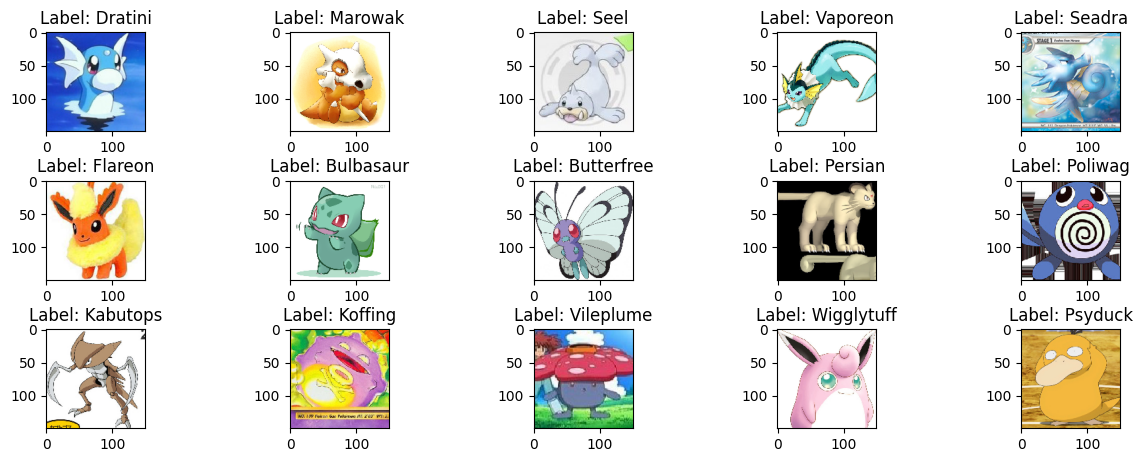

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

In [12]:
np.unique(y)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

# Train Test Split and encoding of labels

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149]), array([36, 44, 40, 39, 25, 39, 35, 41, 39, 38, 20, 37, 43, 35, 33, 36, 38,
       34, 37, 31, 21, 28, 34, 41, 29, 28, 35, 40, 34, 39, 37, 34, 34, 38,
       30, 40

In [14]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)

In [15]:
y_train = np.eye(nb)[y_train]
y_test = np.eye(nb)[y_test]

In [16]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('model_pokemon')

# Verify the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 150)               192150    
                                                                 
Total params: 2,450,134
Trainable params: 2,053,590
Non-trainable params: 396,544
_________________________________________________________________


In [ ]:
y_pred = model.predict(X_test)
pred = np.argmax(y_pred,axis=1)
print(pred)

2024-06-07 14:57:02.853201: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 405540000 exceeds 10% of free system memory.
2024-06-07 14:57:03.546435: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 405540000 exceeds 10% of free system memory.
2024-06-07 14:57:06.667327: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


In [ ]:
ground = np.argmax(y_test,axis=1)

# Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ground,pred,target_names = labels))

                  precision    recall  f1-score   support

         Poliwag       0.91      1.00      0.95        10
         Voltorb       1.00      0.91      0.95        11
          Rhydon       1.00      0.91      0.95        11
         Kingler       0.92      0.92      0.92        12
       Poliwrath       1.00      0.67      0.80         6
            Jynx       1.00      1.00      1.00        15
          Weedle       1.00      1.00      1.00        13
        Cloyster       1.00      0.50      0.67         8
       Exeggutor       1.00      1.00      1.00         7
          Fearow       1.00      0.80      0.89        10
        Alakazam       0.75      0.75      0.75         8
       Dragonite       1.00      1.00      1.00         7
          Oddish       1.00      1.00      1.00        10
         Pidgeot       1.00      0.85      0.92        13
        Shellder       1.00      1.00      1.00         7
      Victreebel       1.00      1.00      1.00        15
          Gen

In [ ]:
y_pred

array([[7.2569221e-11, 1.8562338e-09, 7.8927531e-09, ..., 1.2353592e-08,
        2.0767598e-12, 6.3688096e-12],
       [1.3581233e-13, 5.9670666e-14, 1.1714617e-12, ..., 7.7082250e-11,
        5.6627419e-14, 1.8634018e-12],
       [2.7883551e-10, 2.0001014e-09, 1.9783328e-11, ..., 2.1230843e-08,
        3.6808272e-09, 3.1194358e-09],
       ...,
       [4.8729460e-09, 3.8648537e-12, 2.5928790e-05, ..., 5.8956330e-06,
        2.5924585e-09, 1.0420070e-07],
       [2.0704304e-10, 3.7802284e-10, 3.7034702e-11, ..., 1.7650983e-07,
        2.7705140e-11, 3.8857018e-10],
       [3.1477462e-05, 1.9349287e-05, 7.8381432e-05, ..., 4.3402377e-01,
        6.3580213e-05, 3.4603965e-04]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([142,  82, 120, ...,  43, 105, 147])

In [ ]:
y_true = np.argmax(y_test,axis=1)
y_true

array([142,  82, 120, ...,  43, 105,  51])

# Visualizing the wrongly classified images

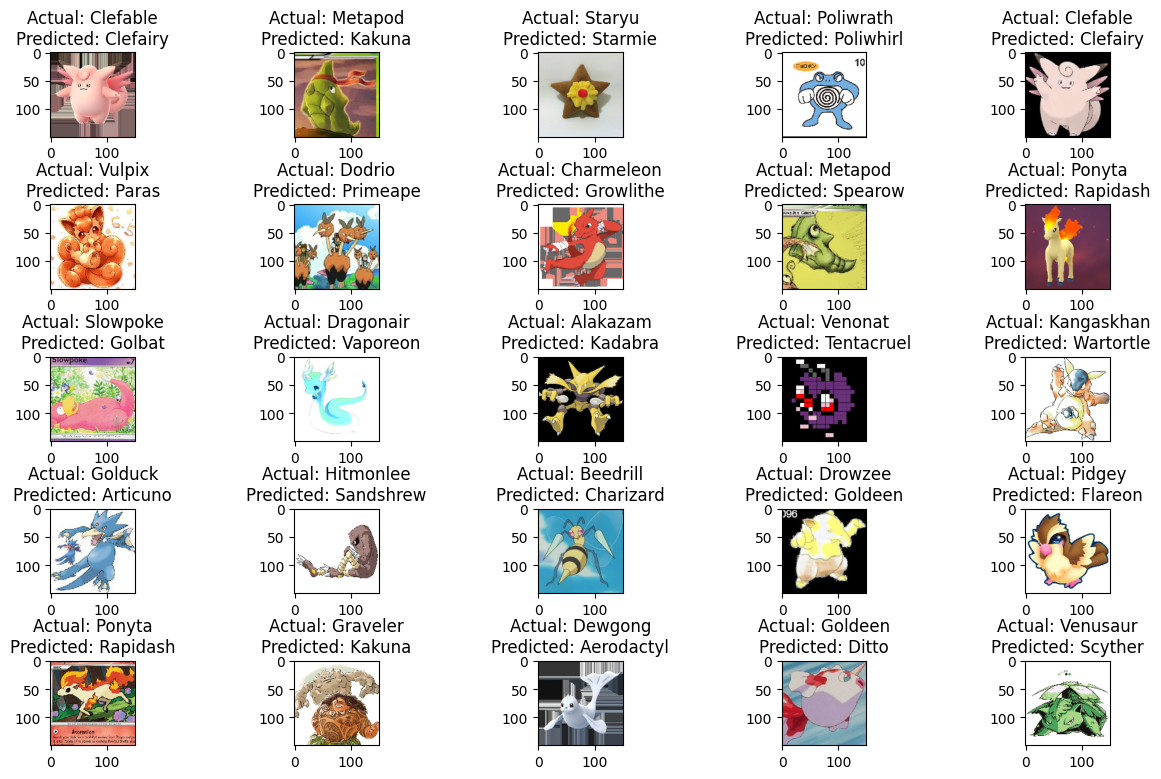

In [ ]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(len(X_test)):
    if y_pred[i] != y_true[i]:
        n+=1
        if n <= 25:
            plt.subplot(5 , 5, n)
            plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
            plt.imshow(X_test[i])
            plt.title(f'Actual: {labels[y_true[i]]}\nPredicted: {labels[y_pred[i]]}')

# Pipelining the classification results to the Pokemon API

In [22]:
import cv2

image = cv2.imread('eevee.png')

img = cv2.resize(image, (150, 150))
img=img/255.0
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
label = np.argmax(pred,axis=1)
print(labels[label[0]])

1/1 [==============================] - 0s 44ms/step
Eevee


In [23]:
import requests

In [24]:
pokemon = labels[label[0]].lower()
url = f'https://pokeapi.co/api/v2/pokemon/{pokemon}'
r = requests.get(url)

In [25]:
print("Name: ",r.json()['name'])
print("Base Experience: ",r.json()['base_experience'])
print("Height: ",r.json()['height'],'m')
print("Weight: ",r.json()['weight'],'kg')

Name:  eevee
Base Experience:  65
Height:  3 m
Weight:  65 kg
